In [2]:
import emerge
import matplotlib.pyplot as plt

In [3]:
import importlib
importlib.reload(emerge)
from astropy.io import ascii

In [5]:
data = ascii.read("/home/nkaufmann/home0/nicolas/multibin_dev/lorek_tests/emerge/emerge/data.dat")

In [ ]:
data = emerge.read_data()

In [22]:
res = emerge.t_embryo(data,0.5,1.0,200,2.0,mode="moon")

QhullError: QH6214 qhull input error: not enough points(4) to construct initial simplex (need 482)

While executing:  | qhull d Q12 Qbb Qx Qz Qc Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 373559236  delaunay  Q12-allow-wide  Qbbound-last  Qxact-merge
  Qz-infinity-point  Qcoplanar-keep  Qtriangulate  _zero-centrum
  Qinterior-keep  Q3-no-merge-vertices-dim-high  _maxoutside  0


In [7]:
from scipy.interpolate import griddata
import numpy as np 
from astropy.io import ascii
def t_embryo(grid,r0,M_star,flux_peb,M_em_fact,mode="trans"):
    names = ["r0","M_star","flux_peb","M_em_fact"]
    x0 = [r0,M_star,flux_peb,M_em_fact]
    x_p = np.vstack((grid[name] for name in names))

    
    if(mode == "trans"):
        f_p = grid["t_trans"]
    elif(mode == "moon"):
        f_p = grid["t_moon"]
    elif(mode == "1e-3"):
        f_p = grid["1e-3"]
    else:
        raise ValueError("unknown mode")
    
    #print(np.shape(x_p),np.shape(f_p),np.shape(x0))
    #x_p = x_p[:,f_p>0]
    #f_p = f_p[f_p>0]
    f_p = np.maximum(f_p,1e-2)
    y_p = np.log(f_p)
    return np.exp(griddata(x_p.T,y_p,x0,rescale=True,method= "linear"))


In [79]:
print(t_embryo(data,0.5,1.0,200,1.5))

(4, 480) (480,) (4,)
[2.25435316]


/tmp/ipykernel_27788/4204320403.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x_p = np.vstack((grid[name] for name in names))


In [61]:
names = ["r0","M_star","flux_peb","M_em_fact"]
x_p = np.vstack((data[name] for name in names))

/tmp/ipykernel_27788/1628320667.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x_p = np.vstack((data[name] for name in names))


In [62]:
points = np.unique(x_p, axis=0)

In [64]:
np.shape(points)

(4, 480)

In [8]:
sma_int = np.logspace(np.log10(0.5),np.log10(50))
mstar_int = np.linspace(0.1,1)
flux = 100
M_em_fact = 1 

grid_dist, grid_star = np.meshgrid(sma_int,mstar_int)


import matplotlib.colors
norm_t_poster = matplotlib.colors.LogNorm(vmin= 1e0,vmax = 1e8)



X = grid_dist
Y = grid_star

fl_x = X.flatten()
fl_y = Y.flatten()
Z = np.zeros_like(fl_x)
for k in range(len(fl_x)):
    Z[k] = t_embryo(data,fl_x[k],fl_y[k],flux,M_em_fact)
Z = np.reshape(Z,np.shape(X))


/tmp/ipykernel_16952/595125105.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x_p = np.vstack((grid[name] for name in names))


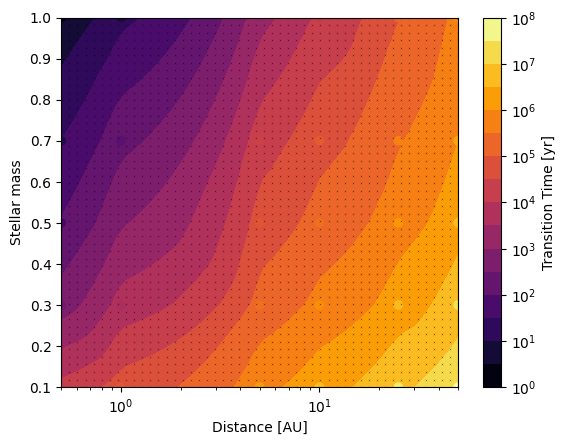

In [15]:



fig = plt.figure()
plt.contourf(X, Y, Z, 100, cmap='inferno',norm= norm_t_poster,levels=np.logspace(0,8,17))
mask = np.logical_and(data["flux_peb"] == flux ,data["M_em_fact"] == M_em_fact)
plt.colorbar(label = "Transition Time [yr]")
plt.scatter(data["r0"][mask],data["M_star"][mask],marker="o",c= norm_t_poster(data["t_trans"][mask]),cmap="inferno")
plt.scatter(X,Y,c="k",marker="x",s=0.01)

plt.xscale("log")
ax =plt.gca()
ax.set_xlabel('Distance [AU]')
ax.set_ylabel(r'Stellar mass')

plt.show()

In [36]:
sma_int = [0.5,1.,5.,10.,25.,50.]
mstar_int = [1,0.7,0.5,0.3,0.1]
flux = 100
M_em_fact = 1 
mask = np.logical_and(data["flux_peb"] == flux ,data["M_em_fact"] == M_em_fact)
sma_int = data["r0"][mask]
mstar_int = data["M_star"][mask]

grid_dist, grid_star = np.meshgrid(sma_int,mstar_int)


import matplotlib.colors
norm_t_poster = matplotlib.colors.LogNorm(vmin= 1e0,vmax = 1e8)



X = grid_dist
Y = grid_star

fl_x = X.flatten()
fl_y = Y.flatten()
Z = np.zeros_like(fl_x)
rel_err = np.zeros_like(fl_x)
for k in range(len(fl_x)):
    Z[k] = t_embryo(data,fl_x[k],fl_y[k],flux,M_em_fact)
    m_loc = np.logical_and(np.logical_and(fl_x[k] == data["r0"],fl_y[k] == data["M_star"]), np.logical_and(data["flux_peb"] == flux ,data["M_em_fact"] == M_em_fact) )
    t_trans_int = data["t_trans"][m_loc]
    rel_err[k] =( Z[k] - t_trans_int )/max(t_trans_int,1e0)
Z = np.reshape(Z,np.shape(X))


/tmp/ipykernel_16952/595125105.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x_p = np.vstack((grid[name] for name in names))


In [46]:
Z = Z.flatten()
err = np.zeros_like(fl_x)
for k in range(len(fl_x)):
    m_loc = np.logical_and(np.logical_and(fl_x[k] == data["r0"],fl_y[k] == data["M_star"]), np.logical_and(data["flux_peb"] == flux ,data["M_em_fact"] == M_em_fact) )
    t_trans_int = data["t_trans"][m_loc]
    err[k] = Z[k] - t_trans_int
Z = np.reshape(Z,np.shape(X))

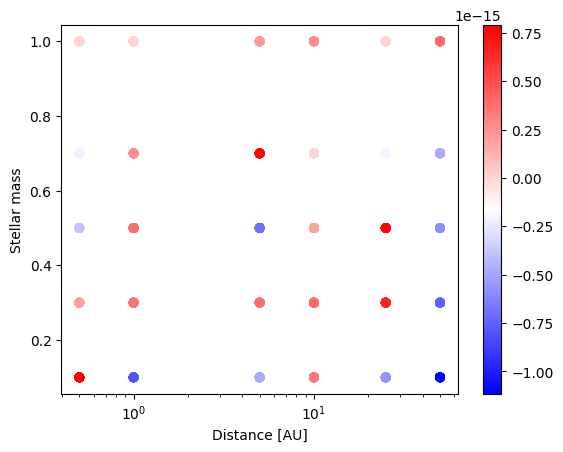

In [53]:

fig = plt.figure()
mask = np.logical_and(data["flux_peb"] == flux ,data["M_em_fact"] == M_em_fact)

col_err = matplotlib.colors.Normalize(vmin=np.min(err), vmax=np.max(err))
plt.scatter(X,Y,marker="o",c=err/Z.flatten(),cmap="bwr")
plt.colorbar()
plt.xscale("log")
ax =plt.gca()
ax.set_xlabel('Distance [AU]')
ax.set_ylabel(r'Stellar mass')

plt.show()

In [50]:
err

-2.2351741790771484e-08

In [40]:
rel_err

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1483285603387416e-16
